In [37]:
from importlib import reload
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations
import seaborn as sns

In [38]:
point = np.array([80, 150])

# Samples with noise
sample_paths = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_noise_0.005_l0.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_noise_0.005_l1.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_noise_0.005_l2.h5']

sample_path_ref = '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_ref.h5'

# Samples without noise
'''sample_paths = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_l0.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_l1.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_l2.h5']

sample_path_ref = '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_noise_0.005_ref.h5' '''

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples'][0:2] ))
    fin.close()

fin = h5py.File(sample_path_ref)
ref_samples = np.array( fin['/samples'][0:2] )
fin.close()

path_meshs = [
        "data/mesh_20_1.msh",
        "data/mesh_20_2.msh",
        "data/mesh_20_3.msh"]

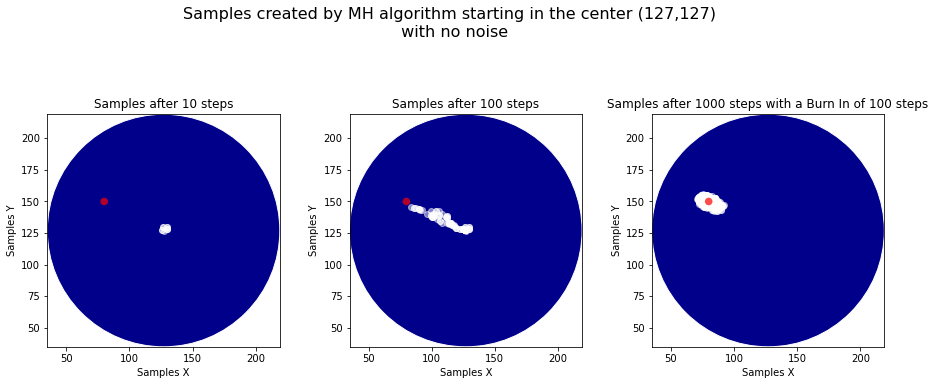

In [39]:
reload(evaluations)
s = samples[-1]

fig, ax = plt.subplots(1, 3, figsize=(15,6.5))
fig.subplots_adjust(wspace=.3)

evaluations.set_ax(ax[0],"darkblue")
ax[0].scatter(s[0, 0:10], s[1, 0:10], c='white', alpha=0.5)
evaluations.draw_point(ax[0],point,0.7)

evaluations.set_ax(ax[1],"darkblue")
ax[1].scatter(s[0, 0:100], s[1, 0:100], c='white', alpha=0.5)
evaluations.draw_point(ax[1],point,0.7)

evaluations.set_ax(ax[2],"darkblue")
ax[2].scatter(s[0, 100:1000], s[1, 100:1000], c='white', alpha=0.5)
evaluations.draw_point(ax[2],point,0.7)

fig.suptitle('Samples created by MH algorithm starting in the center (127,127) \n with no noise', fontsize=16)
ax[0].set_title('Samples after 10 steps')
ax[1].set_title('Samples after 100 steps')
ax[2].set_title('Samples after 1000 steps with a Burn In of 100 steps')
plt.show()

Text(0.5, 1.0, 'Distribution after 1000 steps \n with Burn In of 100 steps')

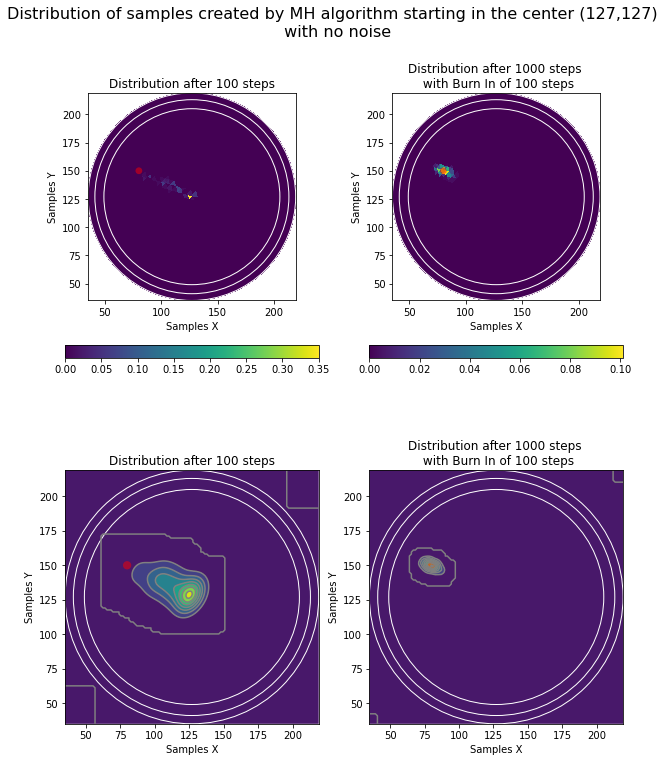

In [40]:
reload(evaluations)

path_mesh = path_meshs[-1]
s = samples[-1]

fig, ax = plt.subplots(2, 2, figsize=(10,12))
fig.subplots_adjust(wspace=.2)

im, vmin, vmax = evaluations.draw_cells(path_mesh,s[:,0:100],ax[0,0])
evaluations.set_ax(ax[0,0])
evaluations.draw_point(ax[0,0],point,0.5)
plt.colorbar(im, ax=ax[0,0],location="bottom")

evaluations.draw_densities(s[:,0:100],ax[1,0])
evaluations.set_ax(ax[1,0])
evaluations.draw_point(ax[1,0],point,0.5)

im, vmin, vmax = evaluations.draw_cells(path_mesh,s[:,100:1000],ax[0,1])
evaluations.set_ax(ax[0,1])
evaluations.draw_point(ax[0,1],point,0.5)
plt.colorbar(im, ax=ax[0,1],location="bottom")

evaluations.draw_densities(s[:,100:1000],ax[1,1])
evaluations.set_ax(ax[1,1])
evaluations.draw_point(ax[1,1],point,0.5)

fig.suptitle('Distribution of samples created by MH algorithm starting in the center (127,127) \n with no noise', fontsize=16)
ax[0,0].set_title('Distribution after 100 steps')
ax[0,1].set_title('Distribution after 1000 steps \n with Burn In of 100 steps')
ax[1,0].set_title('Distribution after 100 steps')
ax[1,1].set_title('Distribution after 1000 steps \n with Burn In of 100 steps')

Text(0.5, 1.0, 'Level 3')

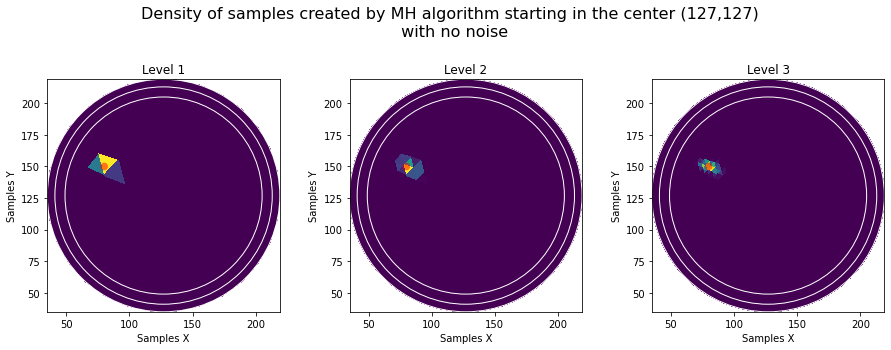

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(15,5.5))
fig.subplots_adjust(wspace=.3)

evaluations.draw_cells(path_meshs[0],samples[0][:,100:1000],ax[0])
evaluations.set_ax(ax[0])
evaluations.draw_point(ax[0],point,0.5)

evaluations.draw_cells(path_meshs[1],samples[1][:,100:1000],ax[1])
evaluations.set_ax(ax[1])
evaluations.draw_point(ax[1],point,0.5)

evaluations.draw_cells(path_meshs[2],samples[2][:,100:1000],ax[2])
evaluations.set_ax(ax[2])
evaluations.draw_point(ax[2],point,0.5)

fig.suptitle('Density of samples created by MH algorithm starting in the center (127,127) \n with no noise', fontsize=16)
ax[0].set_title('Level 1')
ax[1].set_title('Level 2')
ax[2].set_title('Level 3')


Level 0:
Mean = [ 80.5396581  149.94407382]
e1 = 0.5425482485045007
e2 = 0.0473609233393788


Level 1:
Mean = [ 81.4074122  149.36798601]
e1 = 1.5428061417236536
e2 = 0.0513737965513058


Level 2:
Mean = [ 80.28681567 149.57284403]
e1 = 0.5145147737761028
e2 = 0.029088899915472536




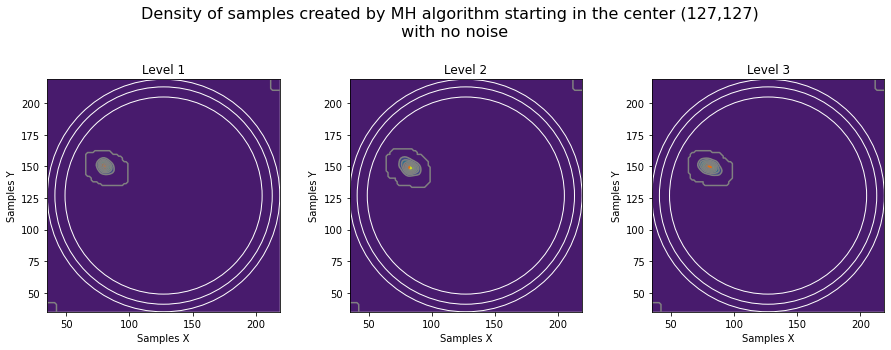

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(15,5.5))
fig.subplots_adjust(wspace=.3)

evaluations.draw_densities(samples[0][:,200:1000],ax[0])
evaluations.set_ax(ax[0])
evaluations.draw_point(ax[0],point,0.5)

evaluations.draw_densities(samples[1][:,200:1000],ax[1])
evaluations.set_ax(ax[1])
evaluations.draw_point(ax[1],point,0.5)

evaluations.draw_densities(samples[2][:,200:1000],ax[2])
evaluations.set_ax(ax[2])
evaluations.draw_point(ax[2],point,0.5)

fig.suptitle('Density of samples created by MH algorithm starting in the center (127,127) \n with no noise', fontsize=16)
ax[0].set_title('Level 1')
ax[1].set_title('Level 2')
ax[2].set_title('Level 3')


centers = evaluations.get_midpoints(meshio.read(path_meshs[-1]))
bins_ref = evaluations.binning(centers,ref_samples[:,1000:])

for i in range(len(sample_paths)):
    print("Level " + str(i) + ":")
    mean = np.mean(samples[i][:,100:], axis=1)
    print("Mean = " + str(mean))
    print("e1 = "+ str(np.linalg.norm(mean-point)))
    bins = evaluations.binning(centers,samples[i][:,100:])
    error = np.linalg.norm(bins_ref-bins,2)
    print("e2 = " + str(error))
    print("\n")



Text(0.5, 1.0, 'Relative noise ratio rho=0.01')

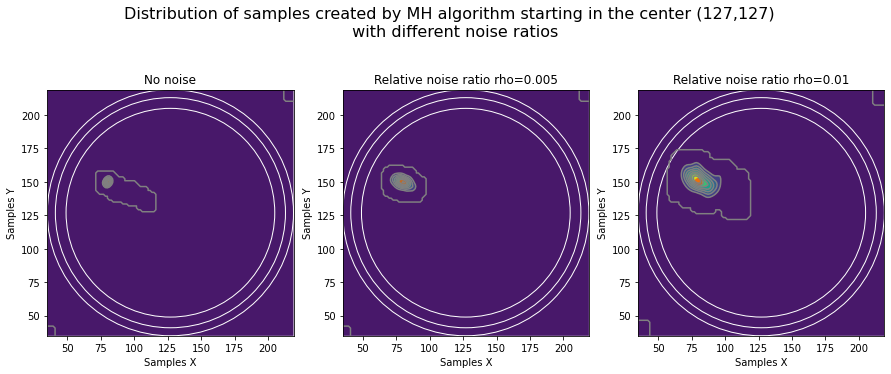

In [43]:
sample_paths_noise_level = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_l2.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_noise_0.005_l2.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_noise_0.01_l2.h5']

samples_noise_level = []

for i in range(len(sample_paths_noise_level)):
    fin = h5py.File(sample_paths_noise_level[i])
    samples_noise_level.append(np.array( fin['/samples'][0:2] ))
    fin.close()

fig, ax = plt.subplots(1, 3, figsize=(15,6))
fig.subplots_adjust(wspace=.2)

evaluations.draw_densities(samples_noise_level[0][:,100:1000],ax[0])
evaluations.set_ax(ax[0])
evaluations.draw_point(ax[0],point,0.5)

evaluations.draw_densities(samples_noise_level[1][:,100:1000],ax[1])
evaluations.set_ax(ax[1])
evaluations.draw_point(ax[1],point,0.5)

evaluations.draw_densities(samples_noise_level[2][:,100:1000],ax[2])
evaluations.set_ax(ax[2])
evaluations.draw_point(ax[2],point,0.5)

fig.suptitle('Distribution of samples created by MH algorithm starting in the center (127,127) \n with different noise ratios', fontsize=16)
ax[0].set_title('No noise')
ax[1].set_title('Relative noise ratio rho=0.005')
ax[2].set_title('Relative noise ratio rho=0.01')